In [77]:
import numpy as np
import matplotlib.pyplot as plt


In [78]:
delta_t = 0.01
tau_0_values_1 = 3 * delta_t
tau_0_values_2 = 12 * delta_t
sigma_y = 1 / 9
beta = 1.0/tau_0_values_1
alpha = 0.06
N = 12 * 100 
print(N)

1200


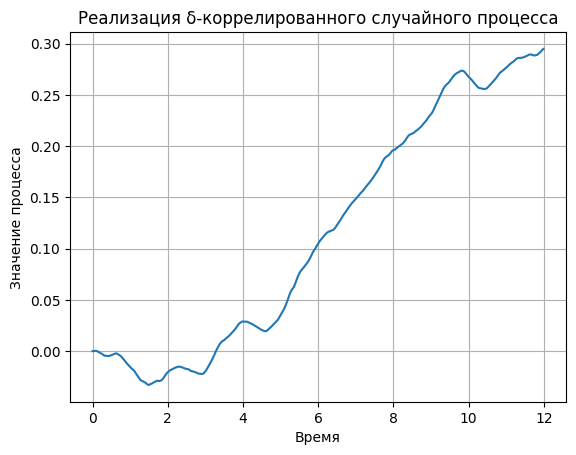

In [79]:

np.random.seed(102)
random_values = np.random.normal(0, sigma_y, N)
process = np.zeros(N)
for i in range(2, N):
    process[i] = alpha * delta_t * random_values[i] + 2 * np.exp(-alpha * delta_t) * process[i - 1] - np.exp(-2 * alpha * delta_t) * process[i - 2]
time = np.arange(0, N) * delta_t
plt.plot(time, process)
plt.xlabel('Время')
plt.ylabel('Значение процесса')
plt.title('Реализация δ-коррелированного случайного процесса')
plt.grid(True)
plt.show()

In [80]:
def theoretical_autocorrelation(tau, sigma_y, beta):
    return sigma_y * np.exp(-beta * np.abs(tau))

def calculate_theoretical(process,tau,sigma_y):
    N = len(process)
    beta = 1.0/tau
    return [theoretical_autocorrelation(t, sigma_y, beta) for t in range(N)]

acf_values_1 = calculate_theoretical(random_values_1,tau_0_1,sigma_y_squared)
acf_values_2 = calculate_theoretical(random_values_2,tau_0_2,sigma_y_squared)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (2400,)

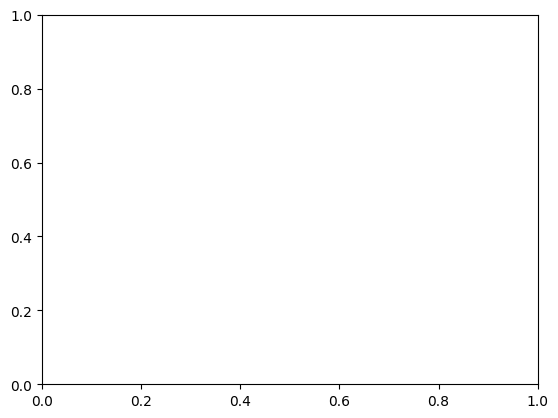

In [84]:
empirical_autocorrelation =  np.correlate(process, process, mode='full')/max(np.correlate(process, process, mode='full'))

plt.plot(tau_values, autocorrelation_values, label='Теоретическая АКФ')
plt.plot(tau_values[:len(tau_values)-1], empirical_autocorrelation, label='Экспериментальная АКФ')
plt.xlabel('Задержка (tau)')
plt.ylabel('АКФ')
plt.legend()
plt.show()


In [82]:
from scipy.stats import norm

confidence_level = 0.98
z = norm.ppf(1 - (1 - confidence_level) / 2)

confidence_interval = z / np.sqrt(N)

lower_bound = max(empirical_autocorrelation) - confidence_interval
upper_bound = max(empirical_autocorrelation) + confidence_interval

interval = [lower_bound, upper_bound]
print("АКФ в нуле:",round(max(empirical_autocorrelation),2))
print(interval)


АКФ в нуле: 31.77
[31.69972599306669, 31.834037750197307]


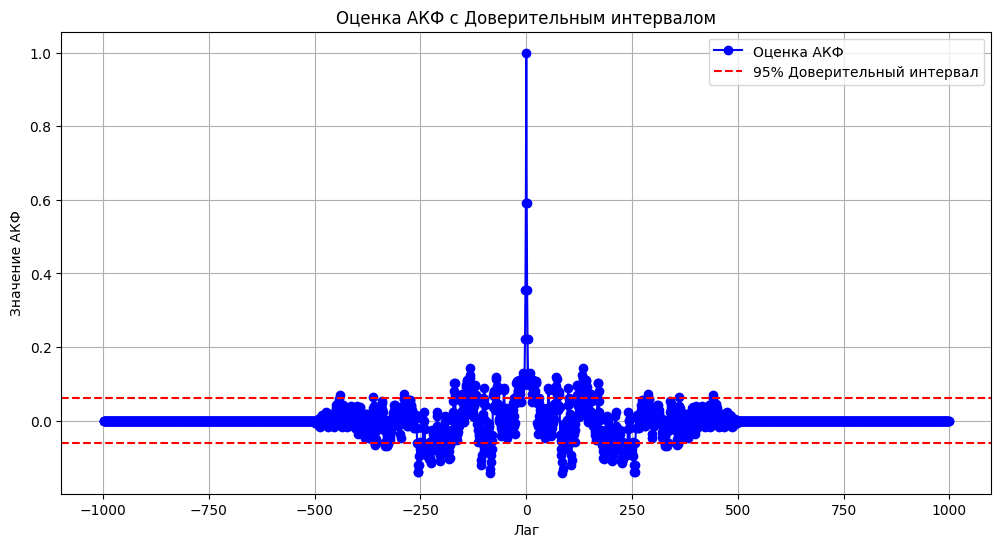

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import norm

# Заданные параметры
N = 1000  # Размер выборки
beta = 0.5  # Параметр для АКФ
confidence_level = 0.95  # Уровень доверия

# Генерация случайных данных
mean = 0
std_deviation = 1
random_values = np.random.normal(mean, std_deviation, N)

# Создание реализации процесса с заданной АКФ
tau_values = np.arange(0, N)
autocorrelation = np.exp(-beta * tau_values)
realization = np.convolve(random_values, autocorrelation, mode='same')

# Оценка АКФ
estimated_autocorrelation = correlate(realization, realization, mode='full')
estimated_autocorrelation /= np.max(estimated_autocorrelation)  # Нормировка

# Расчет доверительных интервалов
n_lags = len(estimated_autocorrelation) // 2
z_alpha = norm.ppf(1 - (1 - confidence_level) / 2)  # Критическое значение для уровня доверия
confidence_intervals = z_alpha / np.sqrt(N)

# Построение графика
lags = np.arange(-n_lags, n_lags + 1)
plt.figure(figsize=(12, 6))
plt.plot(lags, estimated_autocorrelation, marker='o', linestyle='-', color='b', label='Оценка АКФ')
plt.axhline(confidence_intervals, color='r', linestyle='--', label=f'{int(confidence_level * 100)}% Доверительный интервал')
plt.axhline(-confidence_intervals, color='r', linestyle='--')
plt.xlabel('Лаг')
plt.ylabel('Значение АКФ')
plt.title('Оценка АКФ с Доверительным интервалом')
plt.legend()
plt.grid(True)
plt.show()
